In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import env

import acquire as a
import acquire2 as ac2

from os.path import isfile
from importlib import reload

### Questions:

* 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
* 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
* 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
* 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
* 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
* 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
* 7. Which lessons are least accessed?

In [2]:
#Get the data
reload(a)
curriculum_df = a.wrangle_curriculum_access()
curriculum_df.head()

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,129 days,Java


In [3]:
#Names of programs
curriculum_df.program_name.value_counts()

Java            713365
data_science    103412
PHP              30548
front_end            5
Name: program_name, dtype: int64

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
* Curiculum pages viewed **many** times

•	PHP cohorts hit the following curriculum items most often:
Html-css, java-I, laravel intro, javascript-i, javascript-ii

•	Java cohorts hit the following curriculum items most often:
Javascript-i, html-css, toc (is this a thing?), jquery, java-i, spring (incase toc is not a thing)

•	Data Science cohorts hit the following curriculum items most often:
Fundamentals (intro-to-data-science, AI-ML-DL-timeline, git), sql/mysql-overview, classification (overview, scale_features_or_not), python (intro-to-matplotlib, advanced-dataframes, dataframes)
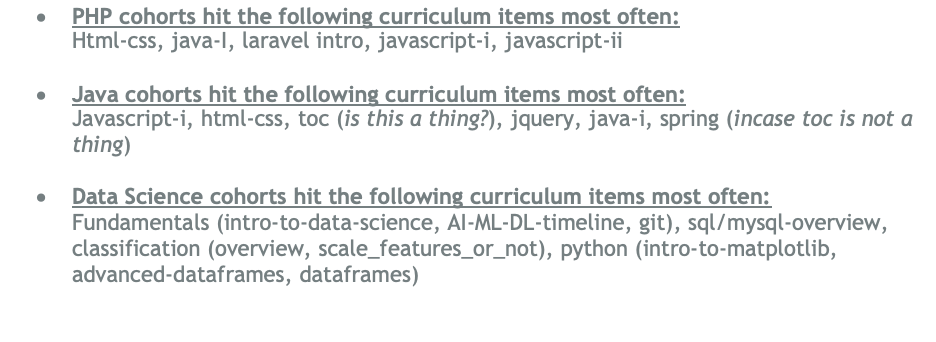

In [5]:
df = curriculum_df.copy()

In [6]:
df.columns.tolist()

['page',
 'id',
 'ip',
 'cohort_name',
 'start_date',
 'end_date',
 'program_length',
 'program_name']

In [7]:
map_dict = {
    'full stack PHP': 'php', 
    'full stack Java': 'java', 
    'front end': 'front_end', 
    'data science': 'data_science'}

In [11]:
#df['program_name'] = df['program_name'].map(map_dict)

In [8]:
php_page_access = df[df['program_name'] == 'PHP'].groupby(['page'])['program_name', 'id', 'cohort_name'].nunique()
php_page_access.sort_values(by=['id'], ascending=False).head(50)

,program_name,id,cohort_name
page,,,
/,1,90,13
content/html-css,1,43,10
java-i,1,40,11
html-css,1,40,11
content/laravel/intro,1,37,10
javascript-i,1,35,11
toc,1,33,10
javascript-ii,1,33,9
content/git,1,33,8


In [9]:
# data science curriculum views
ds_page_access = df[df['program_name'] == 'data_science'].groupby(['page'])['program_name', 'id', 'cohort_name'].nunique()
ds_page_access.sort_values(by=['id'], ascending=False).head(50)

,program_name,id,cohort_name
page,,,
/,1,111,5
search/search_index.json,1,98,5
1-fundamentals/1.1-intro-to-data-science,1,91,5
1-fundamentals/AI-ML-DL-timeline.jpg,1,89,5
1-fundamentals/modern-data-scientist.jpg,1,89,5
fundamentals/intro-to-data-science,1,88,5
fundamentals/modern-data-scientist.jpg,1,87,5
fundamentals/AI-ML-DL-timeline.jpg,1,87,5
classification/overview,1,85,5


In [11]:
#curriculum pages viewed by java program students
java_page_access = df[df['program_name'] == 'Java'].groupby(['page'])['program_name', 'id', 'cohort_name'].nunique()
java_page_access.sort_values(by=['id'], ascending=False).head(50)

,program_name,id,cohort_name
page,,,
/,1,713,28
javascript-i,1,658,28
html-css,1,648,28
javascript-i/functions,1,606,28
javascript-i/javascript-with-html,1,601,28
toc,1,596,28
javascript-i/conditionals,1,595,28
html-css/elements,1,593,26
jquery,1,590,28


## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [12]:
#Taking all activity for students, not staff
student_df = curriculum_df[curriculum_df.cohort_name != "Staff"]
student_df.head()

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2018-01-26 09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,137 days,PHP
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,129 days,Java


In [13]:
#Aggregate by Cohort name and Page. Make into a dataframe
page_by_cohort = student_df.groupby(['cohort_name'])['page'].value_counts()
page_by_cohort = pd.DataFrame(page_by_cohort)

In [14]:
# Make df readable
page_by_cohort.columns = ['page_count']
page_by_cohort = page_by_cohort.reset_index()
page_by_cohort = page_by_cohort[page_by_cohort['page'] != '/']
page_by_cohort = page_by_cohort.set_index('cohort_name')
page_by_cohort.head()

,page,page_count
cohort_name,,
Andromeda,toc,638
Andromeda,javascript-i,516
Andromeda,spring,487
Andromeda,java-iii,433
Andromeda,java-ii,398


In [15]:
max_page_by_cohort = page_by_cohort.groupby('cohort_name').max()
max_page_by_cohort

,page,page_count
cohort_name,,
Andromeda,web-design/ux/purpose,638
Apex,web-design/ux/purpose,1497
Apollo,content/html-css/introduction.html,2
Arches,uploads/5762c2946250b.jpg,294
Badlands,toc,6
Bash,web-dev-day-two,660
Bayes,viz.py,650
Betelgeuse,web-design/ux/purpose,761
Ceres,web-design/ux/purpose,1380


In [16]:
#Create dataframes for Data Science and Web development
#DS program dataframe
ds_df = curriculum_df[(curriculum_df.program_name == 'data_science') & (curriculum_df.cohort_name != 'Staff')]
#Web Dev/PHP dataframe
web_df = curriculum_df[(curriculum_df.program_name != 'data_science') & (curriculum_df.cohort_name != 'Staff')]

In [17]:
ds_df.head()

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2019-08-20 09:39:58,/,466,97.105.19.58,Bayes,2019-08-19,2020-01-30,164 days,data_science
2019-08-20 09:39:59,/,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,164 days,data_science
2019-08-20 09:39:59,/,468,97.105.19.58,Bayes,2019-08-19,2020-01-30,164 days,data_science
2019-08-20 09:40:02,/,469,97.105.19.58,Bayes,2019-08-19,2020-01-30,164 days,data_science
2019-08-20 09:40:08,/,470,97.105.19.58,Bayes,2019-08-19,2020-01-30,164 days,data_science


In [18]:
#Get max pages by cohort for all
max_page_by_cohort_df = pd.DataFrame()
for i in max_page_by_cohort.index:
    df1 = page_by_cohort.loc[i][page_by_cohort.loc[i]['page_count'] == (max_page_by_cohort.loc[i]['page_count'])]
    max_page_by_cohort_df = pd.concat([max_page_by_cohort_df, df1])
max_page_by_cohort_df

,page,page_count
cohort_name,,
Andromeda,toc,638
Apex,search/search_index.json,1497
Apollo,content/html-css,2
Arches,javascript-i,294
Badlands,content/php_ii/command-line,6
Bash,search/search_index.json,660
Bayes,1-fundamentals/modern-data-scientist.jpg,650
Betelgeuse,search/search_index.json,761
Ceres,search/search_index.json,1380


### Going to investigate Several lessons that appear and see the value counts for each (DS and WD) to see if they are truly anomalies

In [19]:
#Looking at classification overview for Data Science
page_by_cohort[(page_by_cohort.index.isin(ds_df.cohort_name)) & (page_by_cohort.page == 'classification/overview')]

,page,page_count
cohort_name,,
Bayes,classification/overview,35
Curie,classification/overview,136
Darden,classification/overview,1109
Easley,classification/overview,445
Florence,classification/overview,60


In [20]:
page_by_cohort.head()

,page,page_count
cohort_name,,
Andromeda,toc,638
Andromeda,javascript-i,516
Andromeda,spring,487
Andromeda,java-iii,433
Andromeda,java-ii,398


### For Data Science, Darden cohort looked at classification overview 1109 times, while Bayes cohort looked at classification overview 35 times. The other DS cohorts range from 60-445 times.

### Web Dev/PHP Cohort page views

In [21]:
#looking in page by cohort to make comparison java iii
page_by_cohort[(page_by_cohort.index.isin(web_df.cohort_name)) & (page_by_cohort.page == 'java-iii')]

,page,page_count
cohort_name,,
Andromeda,java-iii,433
Apex,java-iii,663
Arches,java-iii,153
Bash,java-iii,324
Betelgeuse,java-iii,472
Ceres,java-iii,682
Deimos,java-iii,523
Europa,java-iii,451
Fortuna,java-iii,786


In [22]:
#looking in page by cohort to make comparison java iii
page_by_cohort[(page_by_cohort.index.isin(web_df.cohort_name)) & (page_by_cohort.page == 'content/html-css')]

,page,page_count
cohort_name,,
Andromeda,content/html-css,3
Apollo,content/html-css,2
Arches,content/html-css,9
Badlands,content/html-css,1
Betelgeuse,content/html-css,3
Glacier,content/html-css,29
Hampton,content/html-css,1
Ike,content/html-css,9
Joshua,content/html-css,19


### I've tested many of these for Web Dev/PHP and nothing really stands out as being accessed much more/much less than other curriculum items. Changes in naming of course modules also created more unique curriculum items that were the same/similar even though the page was different

----------

## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [23]:
#Taking all activity from students active in course(from start date to end date)
active_df = student_df[(student_df.end_date >= student_df.index) & (student_df.start_date <= student_df.index)]
active_df = active_df[active_df['page'] != '/']
active_df.head()

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,129 days,Java
2018-01-26 09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,129 days,Java
2018-01-26 09:56:46,javascript-i/conditionals,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,129 days,Java
2018-01-26 09:56:48,javascript-i/functions,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,129 days,Java
2018-01-26 09:56:59,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,129 days,Java


In [24]:
#Aggregating pages by student
pages_by_student = active_df.groupby(['id'])['page'].value_counts()
pages_by_student

id   page                                            
2    java-iii                                            50
     mysql                                               32
     java-ii                                             30
     spring                                              29
     jquery                                              28
                                                         ..
981  examples/css/bootstrap-grids.html                    3
     appendix/professional-development/t-block-resume     1
     examples/bootstrap-grid/assets.zip                   1
     html-css/css-ii                                      1
     javascript-ii                                        1
Name: page, Length: 88169, dtype: int64

In [25]:
pages_by_student =pd.DataFrame(pages_by_student)
pages_by_student.head()

page
id page          
2  java-iii    50
   mysql       32
   java-ii     30
   spring      29
   jquery      28

In [26]:
#cleaning it up
pages_by_student.columns = ['page_count']
pages_by_student = pages_by_student.reset_index()
pages_by_student = pages_by_student.groupby('id').sum('page_count')
pages_by_student.nsmallest(n=30, columns='page_count')

,page_count
id,
832,2
278,3
539,4
956,4
388,7
812,7
679,10
941,10
572,11


In [27]:
#Looking at 832, Very little activity, in the middle of the course too, full stack Java Jupiter
user_832 = active_df[active_df.id == 832]
user_832

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2020-12-07 14:22:38,javascript-i,832,69.154.52.98,Jupiter,2020-09-21,2021-03-30,190 days,Java
2020-12-07 14:22:39,html-css,832,69.154.52.98,Jupiter,2020-09-21,2021-03-30,190 days,Java


In [28]:
#Looking at 278, activity towards end of program (very little)
user_278 = active_df[active_df.id == 278]
user_278

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2018-09-27 14:47:37,java-ii/arrays,278,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,135 days,Java
2018-09-27 14:58:48,java-ii/arrays,278,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,135 days,Java
2018-09-27 14:59:07,java-ii/collections,278,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,135 days,Java


In [29]:
#Looking at 539, may have left the program early on
user_539 = active_df[active_df.id == 539]
user_539

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2019-11-04 16:19:34,toc,539,97.105.19.58,Europa,2019-11-04,2020-04-17,165 days,Java
2019-11-04 16:54:02,html-css,539,97.105.19.58,Europa,2019-11-04,2020-04-17,165 days,Java
2019-11-04 16:54:38,html-css/introduction,539,97.105.19.58,Europa,2019-11-04,2020-04-17,165 days,Java
2019-11-04 16:54:45,html-css/elements,539,97.105.19.58,Europa,2019-11-04,2020-04-17,165 days,Java


In [30]:
#Looking at 812, looks at curriculum towards end of program
user_812 = active_df[active_df.id == 812]
user_812

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2020-11-08 01:45:34,html-css/css-i/selectors-and-properties,812,24.243.49.105,Hyperion,2020-05-26,2020-11-10,168 days,Java
2020-11-08 01:45:41,html-css/elements,812,24.243.49.105,Hyperion,2020-05-26,2020-11-10,168 days,Java
2020-11-08 01:45:56,html-css/css-i/introduction,812,24.243.49.105,Hyperion,2020-05-26,2020-11-10,168 days,Java
2020-11-08 01:46:01,html-css/css-i,812,24.243.49.105,Hyperion,2020-05-26,2020-11-10,168 days,Java
2020-11-08 01:46:04,html-css/forms,812,24.243.49.105,Hyperion,2020-05-26,2020-11-10,168 days,Java
2020-11-08 01:46:06,html-css/elements,812,24.243.49.105,Hyperion,2020-05-26,2020-11-10,168 days,Java
2020-11-08 01:46:07,html-css,812,24.243.49.105,Hyperion,2020-05-26,2020-11-10,168 days,Java


### Many of the users with small page views may have left the program (dates of page views correspond to the begnning of the course. I will reshift those to students who had at least 50 page views

In [31]:
#Students with at least 50 page views
pages_by_student[pages_by_student >= 50].nsmallest(n=10, columns='page_count')

,page_count
id,
56,50.0
46,51.0
543,51.0
962,55.0
36,56.0
858,59.0
57,61.0
45,62.0
975,64.0


In [32]:
#Looking at 56, majority of activity towards end of course
user_56 = active_df[active_df.id == 56]
user_56.head(10)

,page,id,ip,cohort_name,start_date,end_date,program_length,program_name
date,,,,,,,,
2018-01-29 09:40:38,spring/fundamentals/relationships,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 09:40:41,spring/fundamentals/form-model-binding,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 09:40:44,spring/fundamentals/controllers,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 09:40:48,spring,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 12:31:31,java-iii,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 12:31:35,mysql,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 12:31:40,mysql/databases,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 12:32:25,mysql/users,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java
2018-01-29 14:57:37,spring,56,97.105.19.61,Sequoia,2017-09-27,2018-02-15,141 days,Java


### Summary Question 3: All of the users identified with very little activity are Java (Web Development) students. Most with very few page views (Less than 10) could be students who did not finish the program. One user (832) only accesses the curriculum twice during the middle of the course. No Data Science students were located in this query